In [1]:
library("dplyr")
library("rcompanion")
library("car")
library("IDPmisc")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'rcompanion' was built under R version 4.1.3"
Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.1.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Warning message:
"package 'IDPmisc' was built under R version 4.1.3"


In [2]:
Netflix = read.csv("C:/Users/Summe/OneDrive/Desktop/titles - Copy.csv")

In [3]:
head(Netflix)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films â€” many of which are graphic and offensive â€” discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1,,NA,NA,0.600,NA
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NA,tt0075314,8.2,808582,40.965,8.179
3,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NA,tt0068473,7.7,107673,10.010,7.300
4,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NA,tt0071853,8.2,534486,15.461,7.811
5,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy chÃ¢teau and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,,150,"['war', 'action']","['GB', 'US']",NA,tt0061578,7.7,72662,20.398,7.600
6,ts22164,Monty Python's Flying Circus,SHOW,"A British sketch comedy series with the shows being composed of surreality, risquÃ© or innuendo-laden humour, sight gags and observational sketches without punchlines.",1969,TV-14,30,"['comedy', 'european']",['GB'],4,tt0063929,8.8,73424,17.617,8.306


# Exploring the Data

In [4]:
summary(Netflix)

      id               title               type           description       
 Length:5850        Length:5850        Length:5850        Length:5850       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  release_year  age_certification     runtime          genres         
 Min.   :1945   Length:5850        Min.   :  0.00   Length:5850       
 1st Qu.:2016   Class :character   1st Qu.: 44.00   Class :character  
 Median :2018   Mode  :character   Median : 83.00   Mode  :character  
 Mean   :2016                      Mean   : 76.89                     
 3rd Qu.:2020                

In [47]:
glimpse(Netflix)

Rows: 5,850
Columns: 15
$ id                   <chr> "ts300399", "tm84618", "tm154986", "tm127384", "t~
$ title                <chr> "Five Came Back: The Reference Films", "Taxi Driv~
$ type                 <chr> "SHOW", "MOVIE", "MOVIE", "MOVIE", "MOVIE", "SHOW~
$ description          <chr> "This collection includes 12 World War II-era pro~
$ release_year         <int> 1945, 1976, 1972, 1975, 1967, 1969, 1979, 1971, 1~
$ age_certification    <chr> "TV-MA", "R", "R", "PG", "", "TV-14", "R", "R", "~
$ runtime              <int> 51, 114, 109, 91, 150, 30, 94, 102, 110, 104, 158~
$ genres               <chr> "['documentation']", "['drama', 'crime']", "['dra~
$ production_countries <chr> "['US']", "['US']", "['US']", "['GB']", "['GB', '~
$ seasons              <dbl> 1, NA, NA, NA, NA, 4, NA, NA, NA, NA, NA, NA, NA,~
$ imdb_id              <chr> "", "tt0075314", "tt0068473", "tt0071853", "tt006~
$ imdb_score           <dbl> NA, 8.2, 7.7, 8.2, 7.7, 8.8, 8.0, 7.7, 7.7, 5.8, ~
$ imdb_votes    

# Question 1: Is there a difference in IMDBscore among the age certifications of TV-MA, TV-Y and TV-G?


# Data Wrangling

In [5]:
Netflix$age_certification

[1] "TV-MA" "R"     "R"     "PG"    ""      "TV-14" "R"     "R"     "R"    
  [10] "R"     ""      "PG-13" "R"     ""      ""      "PG"    "R"     ""     
  [19] ""      ""      ""      ""      ""      ""      ""      ""      "TV-MA"
  [28] ""      ""      ""      ""      ""      ""      ""      ""      "TV-PG"
  [37] "R"     "R"     "R"     "R"     "R"     "PG"    "R"     "R"     "TV-PG"
  [46] "TV-Y"  "TV-G"  "PG-13" "TV-G"  "PG-13" "PG-13" "R"     "R"     "TV-PG"
  [55] "R"     "TV-Y"  ""      ""      ""      "TV-Y"  "R"     ""      ""     
  [64] ""      "R"     ""      ""      ""      ""      ""      ""      ""     
  [73] ""      ""      ""      "R"     ""      ""      ""      ""      ""     
  [82] ""      ""      "TV-PG" ""      ""      ""      ""      ""      ""     
  [91] ""      "TV-PG" "PG-13" "TV-PG" "R"     "TV-Y7" "R"     "PG-13" "R"    
 [100] "R"     "TV-14" "TV-14" "PG-13" "TV-14" "R"     "PG-13" "PG-13" "TV-14"
 [109] "PG-13" "R"     "TV-14" "R"     "R"     "PG"    "TV-Y7" "PG-13" "R"    
 [118] "TV-Y"  "R"     "TV-Y"  "TV-PG" "TV-14" "PG"    "R"     "PG-13" "TV-G" 
 [127] "PG"    "PG-13" "R"     ""      "PG"    "R"     "PG"    "PG-13" "TV-G" 
 [136] "PG-13" "TV-Y7" "PG-13" "PG-13" "PG-13" "R"     "R"     "R"     "PG"   
 [145] "R"     "TV-G"  "R"     "TV-Y7" "PG-13" "TV-Y7" "R"     "TV-PG" "PG"   
 [154] "PG-13" "R"     "R"     "R"     "TV-PG" "TV-PG" "TV-PG" "TV-MA" "TV-Y7"
 [163] "G"     ""      "G"     "TV-MA" ""      "PG-13" "G"     "TV-MA" ""     
 [172] "R"     "R"     "PG-13" ""      ""      ""      "TV-MA" ""      ""     
 [181] ""      ""      ""      "G"     ""      ""      "G"     ""      ""     
 [190] "G"     "PG"    "PG-13" ""      ""      "PG-13" ""      ""      "PG"   
 [199] "NC-17" "PG-13" ""      ""      ""      ""      "PG-13" ""      ""     
 [208] ""      ""      ""      ""      ""      ""      ""      ""      ""     
 [217] "TV-MA" "TV-PG" "TV-MA" "TV-14" "R"     "PG-13" "TV-PG" "TV-14" "TV-MA"
 [226] "TV-PG" "PG-13" "TV-14" "TV-MA" "TV-PG" "TV-MA" "R"     "TV-14" "TV-Y7"
 [235] "PG-13" "TV-14" "TV-14" "PG-13" "TV-Y7" "R"     "TV-G"  "PG-13" "PG-13"
 [244] "TV-14" "TV-14" "TV-PG" "R"     ""      "TV-Y7" "R"     "TV-14" "PG-13"
 [253] "R"     "R"     "TV-G"  "PG-13" "R"     "R"     "PG-13" "TV-MA" "R"    
 [262] "TV-14" "PG-13" "PG-13" "PG-13" "R"     "R"     "PG-13" "TV-Y7" "PG-13"
 [271] ""      "TV-G"  "R"     "R"     "R"     "R"     "PG-13" "TV-G"  "PG-13"
 [280] "R"     "R"     "PG-13" "R"     "R"     "TV-PG" "TV-Y7" "PG"    "TV-14"
 [289] ""      "R"     "TV-14" "R"     "R"     "PG"    "R"     "R"     "R"    
 [298] "PG-13" "R"     "PG-13" "R"     "TV-14" "R"     "TV-MA" "R"     "TV-G" 
 [307] "PG-13" "PG-13" "TV-Y"  "TV-Y7" "PG-13" "R"     "PG-13" "G"     "PG-13"
 [316] "PG-13" "PG-13" "PG-13" "TV-PG" "R"     "TV-14" "PG"    "R"     "R"    
 [325] "TV-MA" "PG"    "R"     "R"     "PG-13" "TV-14" "R"     "TV-Y"  "TV-G" 
 [334] "R"     "TV-14" "TV-G"  "PG"    ""      "PG-13" "R"     "PG-13" "PG-13"
 [343] "PG"    "PG-13" "R"     "PG-13" "TV-MA" "PG"    "TV-G"  "TV-PG" ""     
 [352] "G"     "R"     "R"     "PG-13" "R"     "PG"    ""      "PG-13" "R"    
 [361] "TV-MA" "R"     "R"     "TV-14" "TV-Y"  ""      "TV-14" "TV-Y7" "PG"   
 [370] "PG-13" "TV-14" "TV-14" "PG"    "PG-13" "G"     "TV-G"  "TV-G"  "PG-13"
 [379] "TV-G"  "TV-PG" "PG"    "TV-14" "TV-MA" "PG"    ""      ""      "TV-Y7"
 [388] "PG"    ""      "PG-13" ""      "PG"    "PG-13" "R"     "R"     ""     
 [397] "R"     "TV-Y7" ""      ""      ""      ""      "R"     "PG"    "R"    
 [406] "TV-14" "G"     "PG"    "PG-13" "R"     "R"     "TV-PG" "PG-13" ""     
 [415] ""      ""      "PG-13" "TV-14" "PG-13" "G"     "PG-13" ""      "G"    
 [424] "PG-13" "TV-14" "TV-MA" "TV-Y"  "TV-14" "PG-13" ""      ""      ""     
 [433] ""      "TV-Y"  "G"     ""      "TV-14" ""      ""      "PG-13" "PG-13"
 [442] "R"     ""      "PG-13" ""      ""      "TV-G"  "R"     "PG-13" "PG-13"
 [451] "PG-13" "G"     "PG-13" "PG-13" ""      "TV-PG

In [48]:
Netflix1 <- (Netflix %>% filter(age_certification %in% c('TV-MA','TV-Y','TV-G')))

In [49]:
unique(Netflix$type)

[1] "SHOW"  "MOVIE"

In [50]:
unique( Netflix1$age_certification)

[1] "TV-MA" "TV-Y"  "TV-G"

In [51]:
unique(Netflix1$type)

[1] "SHOW"

1 dependent variable (IMDBscore). 1 independent vairable with 3 levels. 

**Test: 1 way between subjects ANOVA**

# Create/Confirm normality of Dependent variable 

In [10]:
Netflix1$imdb_score <- as.numeric(Netflix1$imdb_score)

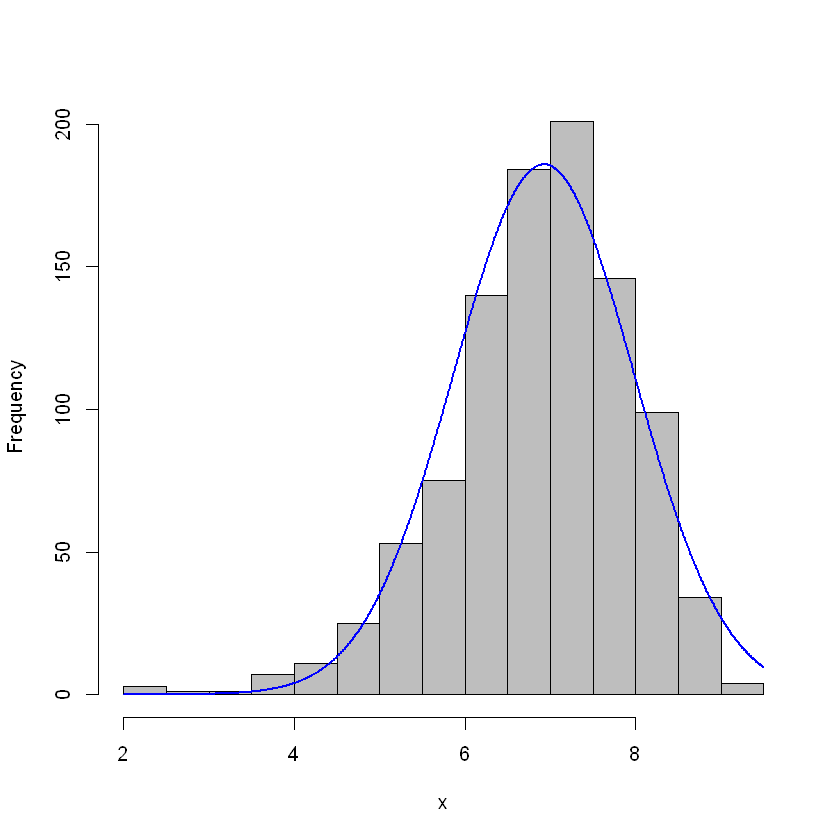

In [11]:
plotNormalHistogram(Netflix1$imdb_score)

In [12]:
Netflix1$imdb_scoreSQ <- Netflix1$imdb_score * Netflix1$imdb_score

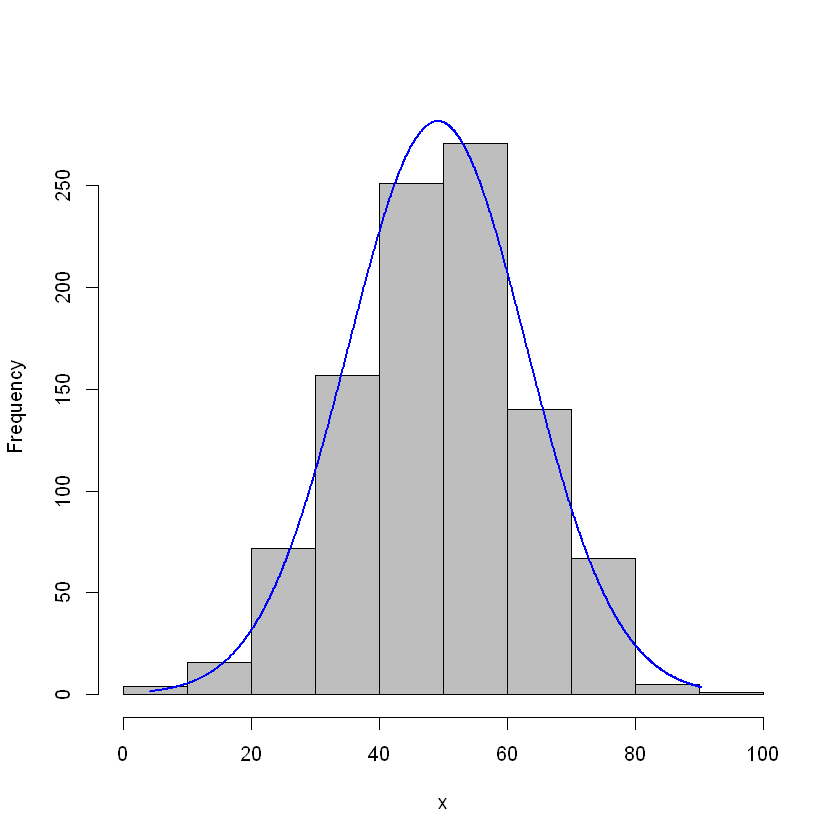

In [13]:
plotNormalHistogram(Netflix1$imdb_scoreSQ)

# Test for Homogeneity of Variance

In [14]:
bartlett.test(imdb_scoreSQ ~ age_certification, data=Netflix1)


	Bartlett test of homogeneity of variances

data:  imdb_scoreSQ by age_certification
Bartlett's K-squared = 2.5777, df = 2, p-value = 0.2756


In [15]:
str(Netflix)

'data.frame':	5850 obs. of  15 variables:
 $ id                  : chr  "ts300399" "tm84618" "tm154986" "tm127384" ...
 $ title               : chr  "Five Came Back: The Reference Films" "Taxi Driver" "Deliverance" "Monty Python and the Holy Grail" ...
 $ type                : chr  "SHOW" "MOVIE" "MOVIE" "MOVIE" ...
 $ description         : chr  "This collection includes 12 World War II-era propaganda films â\200” many of which are graphic and offensive â\"| __truncated__ "A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived "| __truncated__ "Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock ta"| __truncated__ "King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wis"| __truncated__ ...
 $ release_year        : int  1945 1976 1972 1975 1967 1969 1979 1971 1967 1980 ...
 $ age_certification   : chr  "TV-MA" "R" "R" "P

In [16]:
# The p-value is > .05 so we have met this assumption

In [17]:
# Run Analysis 

In [18]:
Netflix1ANOVA <- aov(Netflix1$imdb_score ~ Netflix1$age_certification)

In [19]:
summary(Netflix1ANOVA)

                            Df Sum Sq Mean Sq F value   Pr(>F)    
Netflix1$age_certification   2   47.2   23.60   22.06 4.25e-10 ***
Residuals                  981 1049.4    1.07                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [20]:
# The test shows a significant differencce in ratings between age certifications 

# Computing Post Hocs 

In [21]:
pairwise.t.test(Netflix1$imdb_score, Netflix1$age_certification, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  Netflix1$imdb_score and Netflix1$age_certification 

      TV-G    TV-MA  
TV-MA 3.6e-08 -      
TV-Y  0.18    4.0e-05

P value adjustment method: none 

There is a significant difference for score between G rating and MA rating, and between Y and MA rating. There is not a significant difference between G and Y ratings. 

# Determine Means and Draw Conclusions

In [22]:
Means <- Netflix1 %>% group_by(age_certification) %>% summarize(Mean = mean(imdb_score))

In [23]:
Means

age_certification,Mean
<chr>,<dbl>
TV-G,6.321622
TV-MA,7.018613
TV-Y,6.539773


**Looking at the means we can see that ratings with TV-MA recieve higher IMDB scores on avgerage than shows with a rating of TV-G and TV-Y.**

# Linear Regression 

In [24]:
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")

Warning message:
"package 'car' is in use and will not be installed"
Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\RtmpOCFXHq\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\RtmpOCFXHq\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'predictmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\RtmpOCFXHq\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"



The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\RtmpOCFXHq\downloaded_packages


Installing package into 'C:/Users/Summe/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\00LOCK\lmtest\libs\x64\lmtest.dll to C:\Users\Summe\OneDrive\Documents\R\win-library\4.1\lmtest\libs\x64\lmtest.dll: Permission denied"
Warning message:
"restored 'lmtest'"



The downloaded binary packages are in
	C:\Users\Summe\AppData\Local\Temp\RtmpOCFXHq\downloaded_packages


Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Loading required package: lattice

Warning message:
"package 'predictmeans' was built under R version 4.1.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 4.1.3"
Loading required package: Matrix

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


The following object is masked from 'package:dplyr':

    collapse


Loading required package: lmeInfo

Warning message:
"package 'lmeInfo' was built under R version 4.1.3"
Loading required package: parallel

Warning message:
"package 'e1071' was built under R version 4.1.3"
Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

   

# Question 2 How are the TMBD and IMDB scores related? 

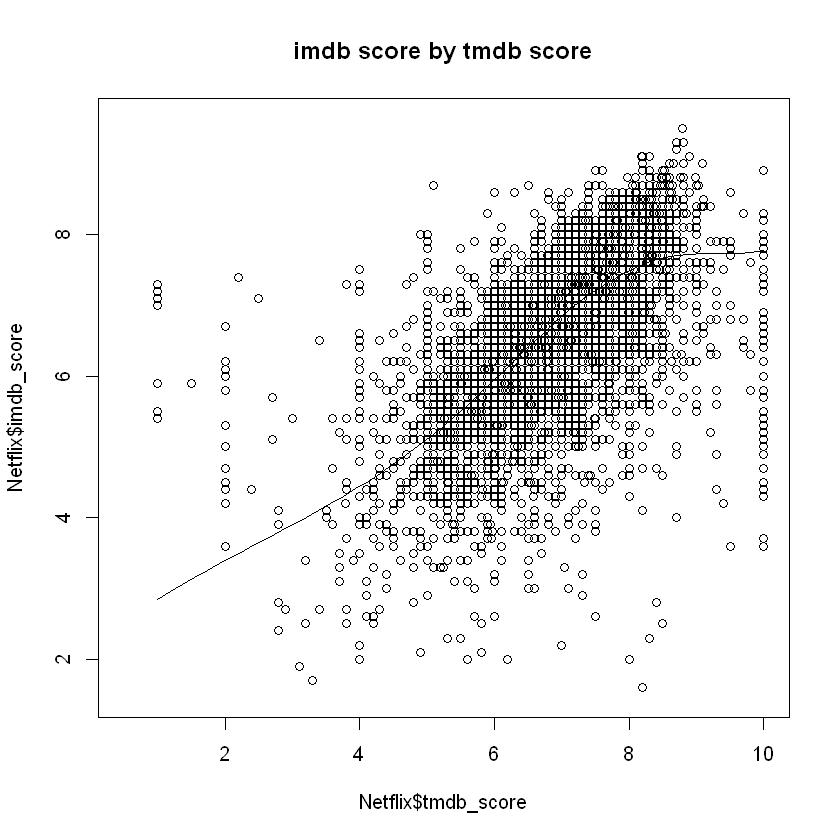

In [25]:
scatter.smooth(x=Netflix$tmdb_score, y=Netflix$imdb_score, main="imdb score by tmdb score")

In [26]:
lmMod <- lm(imdb_score~tmdb_score, data=Netflix)

In [27]:
lmMod


Call:
lm(formula = imdb_score ~ tmdb_score, data = Netflix)

Coefficients:
(Intercept)   tmdb_score  
      2.599        0.574  


# Test for Linearity Passed

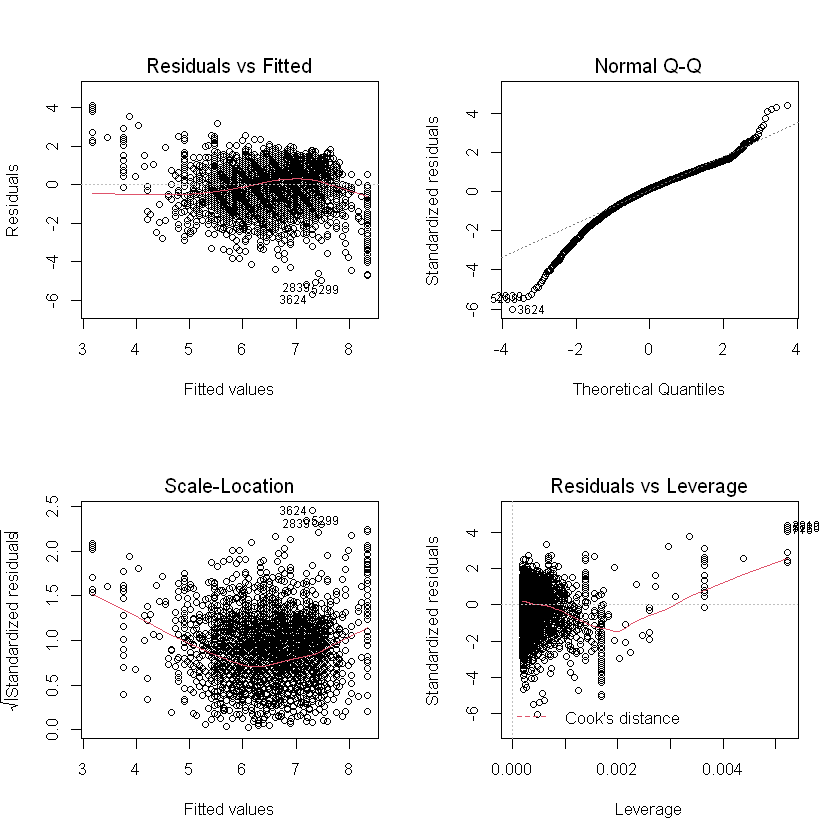

In [28]:
par(mfrow=c(2,2))
plot(lmMod)

In [29]:
lmtest::bptest(lmMod)


	studentized Breusch-Pagan test

data:  lmMod
BP = 3.3555, df = 1, p-value = 0.06698


# Test for Homoscedasticity and for Homogeneity of Variance passed 

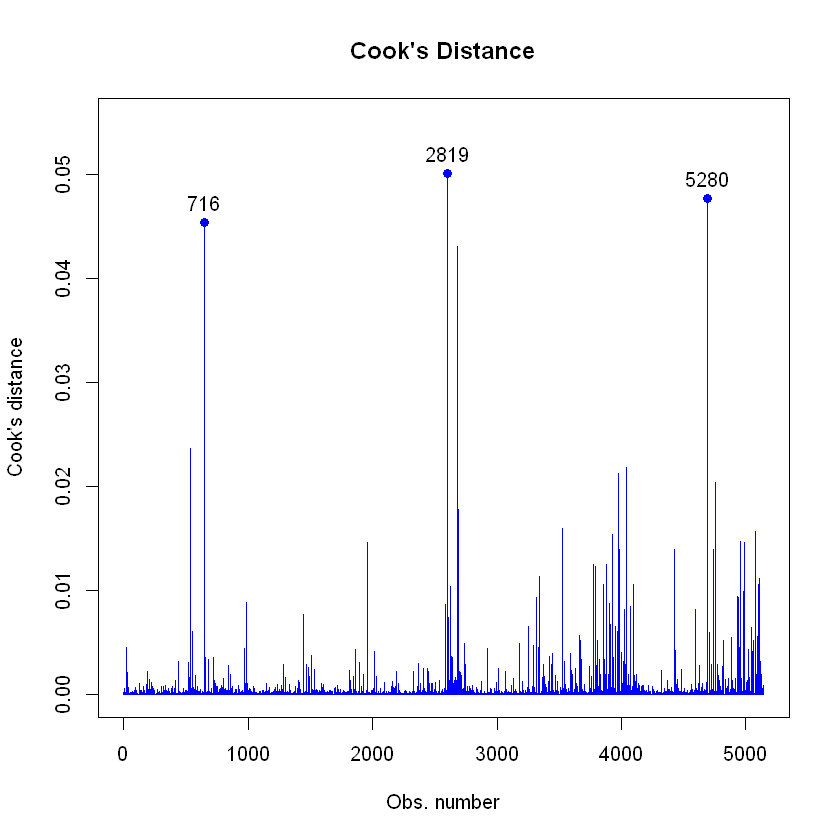

In [30]:
 CookD(lmMod, group=NULL, plot=TRUE, idn=3, newwd=FALSE)

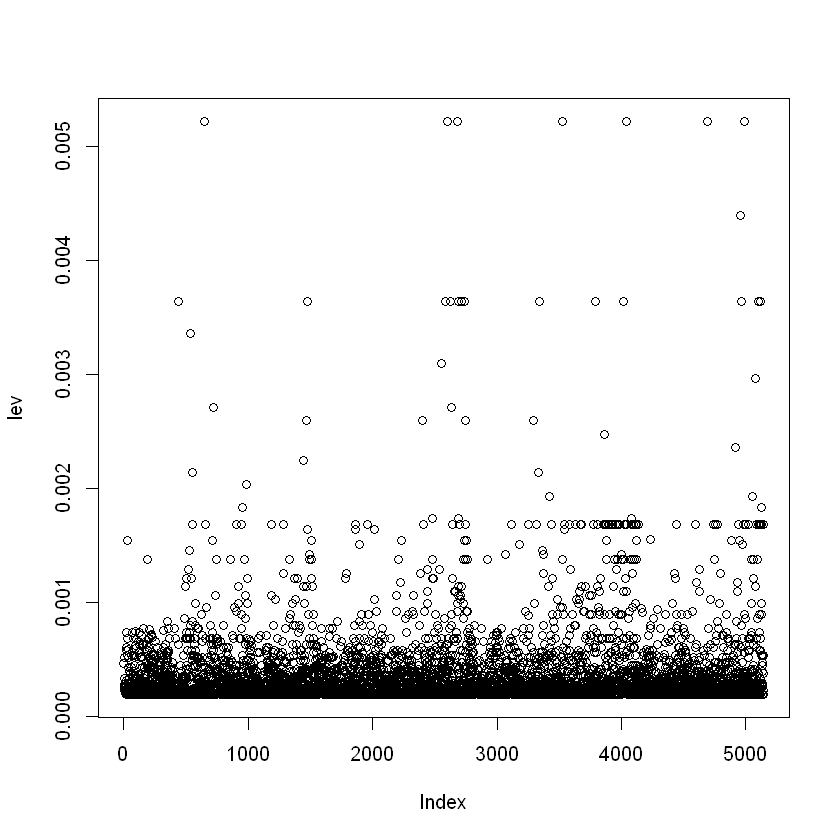

In [31]:
lev = hat(model.matrix(lmMod))
plot(lev)

In [32]:
Netflix[lev>.2,]

id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [33]:
# No outliers in X space

In [34]:
car::outlierTest(lmMod)

      rstudent unadjusted p-value Bonferroni p
3624 -6.052003         1.5319e-09   7.8815e-06
5299 -5.502400         3.9280e-08   2.0210e-04
2839 -5.366492         8.3804e-08   4.3117e-04
4567 -5.275950         1.3749e-07   7.0737e-04
4427 -5.024126         5.2285e-07   2.6901e-03
5353 -4.917611         9.0334e-07   4.6477e-03
4335 -4.895221         1.0120e-06   5.2066e-03
4997 -4.717479         2.4511e-06   1.2611e-02
2945 -4.677718         2.9752e-06   1.5307e-02
5806 -4.557715         5.2911e-06   2.7223e-02

In [35]:
# No outliers in Y space

In [36]:
summary(influence.measures(lmMod))

Potentially influential observations of
	 lm(formula = imdb_score ~ tmdb_score, data = Netflix) :

     dfb.1_ dfb.tmd_ dffit   cov.r   cook.d hat    
20   -0.09   0.08    -0.10_*  1.00_*  0.00   0.00  
30    0.01  -0.01     0.01    1.00_*  0.00   0.00_*
33    0.06  -0.05     0.06_*  1.00_*  0.00   0.00  
201   0.07  -0.06     0.07_*  1.00    0.00   0.00_*
349   0.00  -0.01    -0.04    1.00_*  0.00   0.00  
439   0.02  -0.01     0.04    1.00_*  0.00   0.00  
460   0.08  -0.08     0.08_*  1.00_*  0.00   0.00_*
517   0.00   0.00     0.00    1.00_*  0.00   0.00  
518   0.01  -0.01     0.01    1.00_*  0.00   0.00  
526  -0.01   0.01    -0.01    1.00_*  0.00   0.00  
537  -0.02   0.02    -0.02    1.00_*  0.00   0.00_*
559  -0.08   0.07    -0.08_*  1.00    0.00   0.00_*
567  -0.06   0.05    -0.06    1.00    0.00   0.00_*
585   0.22  -0.21     0.22_*  1.00_*  0.02   0.00_*
589   0.00  -0.01    -0.03    1.00_*  0.00   0.00  
591  -0.03   0.02    -0.03    1.00_*  0.00   0.00_*
595   0.10  -0.10

In [37]:
# No oultiers in X an Y space

In [38]:
summary(lmMod)


Call:
lm(formula = imdb_score ~ tmdb_score, data = Netflix)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7060 -0.4823  0.1254  0.6124  4.1269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.59911    0.07968   32.62   <2e-16 ***
tmdb_score   0.57401    0.01152   49.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9463 on 5143 degrees of freedom
  (705 observations deleted due to missingness)
Multiple R-squared:  0.3258,	Adjusted R-squared:  0.3256 
F-statistic:  2485 on 1 and 5143 DF,  p-value: < 2.2e-16


In [52]:
# There is significant ecidence to prove there is a linear relationship between the Tmdb and Imdb score. 

# Predictions

If the Tmbd score is 6 we can predict that the Imdb score will be 6.04

**(Y = 0.574(X) + 2.59911)**

# Question 5: How does 'year realeased' relate to 'rating'? 

In [40]:
Netflix$release_year <- as.integer(Netflix$release_year)

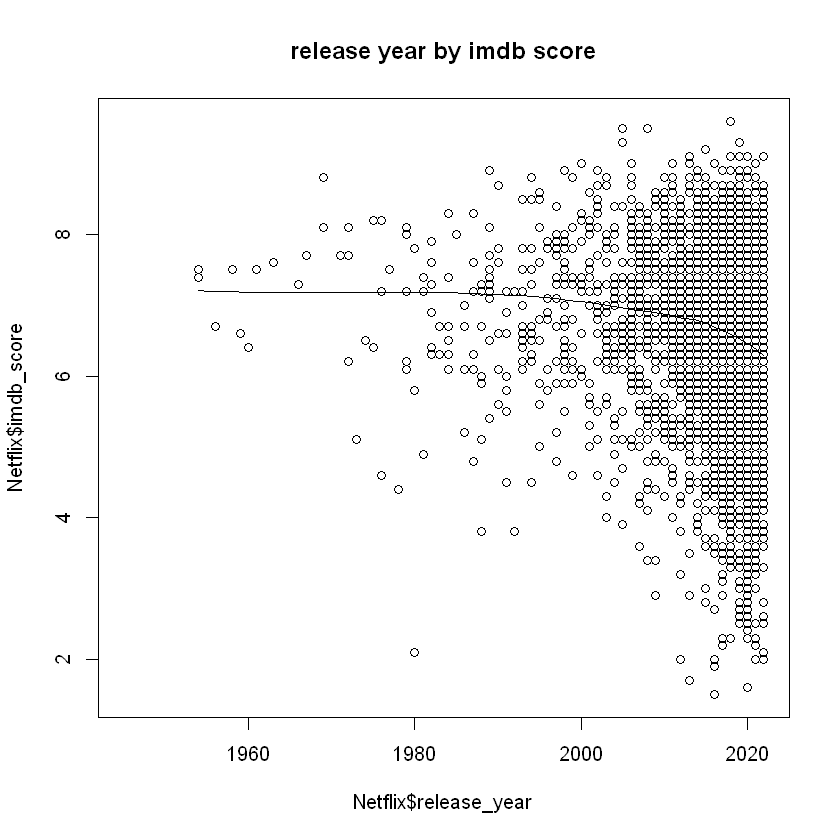

In [41]:
scatter.smooth(x=Netflix$release_year, y=Netflix$imdb_score, main="release year by imdb score")

In [42]:
#Netflix %>% 
#    select(imdb_score) %>% 
  #  drop_na(imdb_score) %>%
 #   filter(!complete.cases(.)) %>%
  #  View()

In [43]:
#Netflix$imdb_score(is.na(Netflix$imdb_score) <- mean(Netflix$imdb_score, na.rm = TRUE)

In [44]:
#Means2 <- Netflix %>% group_by(release_year) %>% summarize(Mean = mean(imdb_score))

# Stepwise Regression - Backwards 

In [45]:
head(NetflixOG)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'NetflixOG' not found


In [ ]:
NetflixOG = read.csv("../Data/Netflix_titles.csv")

In [ ]:
FitAll = lm(imdb_score ~ release_year + age_certification + runtime + production_countries + genres + seasons, data = NetflixOG)

In [ ]:
summary(FitAll)

In [ ]:
step(FitAll, direction = 'backward')

Best indicators of Imdb score: release year, age certification, runtime and number of seasons. 